# Wigner function

The Wigner function, denoted here as $W(q,p)$, is a function (quasiprobability distribution) of the quadratures $q$ and $p$, position and momentum respectively. 
For a quantum state with density matrix $\rho$ the Wigner function is defined as {cite:p}`furusawa2015quantum`

$$
W(q,p) = \frac{1}{2\pi\hbar}\int^{\infty}_{-\infty} e^{-ipy/\hbar} \left\langle q+\frac{y}{2} \right\vert \rho  \left\vert q-\frac{y}{2} \right\rangle dy.
$$

With our convention that $\hbar=1$ this reduces to 


$$
W(q,p) = \frac{1}{2\pi}\int^{\infty}_{-\infty} e^{-ipy} \left\langle q+\frac{y}{2} \right\vert \rho  \left\vert q-\frac{y}{2} \right\rangle dy.
$$

This expression looks a bit daunting. For instance I was confused at first about how to compute the vector-matrix-vector product $\left\langle q+\frac{y}{2} \right\vert \rho  \left\vert q-\frac{y}{2} \right\rangle$. 

## A specfic example

It would be helpful to actually compute this integral for a particular quantum state. 
Let's pick the Fock state $\rho = \ket{n}\bra{n}$ and see if we can do the derivation. A similar derivation to the one that follows can be found in {cite:p}`schleich2011quantum`.

First let's begin by recognizing that the $\left\langle q+\frac{y}{2} \right\vert$ and $\left\vert q-\frac{y}{2} \right\rangle$ are the eigenstates of the $q$ quadrature (position operator). 
Since our state is a pure state $\rho = \ket{\psi}\bra{\psi}$ our Wigner function can be written as 

$$
W(q,p) = \frac{1}{2\pi}\int^{\infty}_{-\infty} e^{-ipy} \left\langle q+\frac{y}{2} \bigg| \psi \right\rangle  \left\langle \psi \bigg| q-\frac{y}{2} \right\rangle dy.
$$

We now have these inner products between eigenstates of the position operator and our quantum state ket $\ket{\psi}$. In a first course on quantum mechanics {cite:p}`townsend2000modern` we learned that such an inner product is given by 

$$
\left\langle q+\frac{y}{2} \bigg| \psi \right\rangle \equiv \psi\left(q+\frac{y}{2}\right)
$$

where $\psi\left(q+\frac{y}{2}\right)$ is the ***wave function*** of the state $\ket{\psi}=\ket{n}$. Naturally the other inner product is given by 

$$
\left\langle \psi \bigg| q-\frac{y}{2} \right\rangle \equiv \psi^*\left(q-\frac{y}{2}\right)
$$

where $*$ denotes the complex conjugate. So we now need the analytic expression for the wave function of the Fock state. 
Since the Fock state $\ket{n}$ is the $n$-th energy eigenstate of the harmonic oscillator it's wave function is (see {cite:p}`beck2012quantum` and {cite:p}`mcintyre2022quantum` for detailed derivation)

$$
\psi_n(q) =  \left( \frac{m\omega}{\pi \hbar} \right)^{1/4} \frac{1}{\sqrt{2^nn!}} H_n(\xi)e^{-\xi^2/2}
$$

where $\xi = \sqrt{\frac{m\omega}{\hbar}}q = q$ and $\left(\frac{m\omega}{\pi \hbar} \right)^{1/4} = \left(\frac{1}{\pi} \right)^{1/4}$, because we are using "natural units" where energy is measured in units of $\hbar\omega$ and distance in units of $\sqrt{\frac{\hbar}{m\omega}}$, and $H_n(\cdot)$ is the the $n$-th physicist's Hermite polynomial.

The Wigner function is now given by

$$
\begin{align*}
W(q,p) &= \frac{1}{2\pi}\int^{\infty}_{-\infty} e^{-ipy} \psi\left(q+\frac{y}{2}\right)  \psi^*\left(q-\frac{y}{2}\right) dy \\
&= \frac{1}{2\pi}  \sqrt{ \frac{1}{\pi} } \int^{\infty}_{-\infty} e^{-ipy} \frac{1}{2^n n!} H_n\left(q-\frac{y}{2}\right) H_n\left(q+\frac{y}{2}\right) e^{-(q+\frac{y}{2})^2/2} e^{-(q-\frac{y}{2})^2/2} dy
\end{align*}
$$

So we've gotten rid of the vector-matrix-vector multiplication in the integrand and now only have products of scalar functions. However this function does not look pretty so lets try to simplify it a little. First we can simplify and rearrange the two exponents involving $q$

$$
\begin{align*}
W(q,p) &= \frac{1}{2\pi}  \frac{1}{ \sqrt{\pi} } \frac{1}{2^n n!} \int^{\infty}_{-\infty} e^{-ipy} e^{-(q^2+y^2/4)}  H_n\left(q-\frac{y}{2}\right) H_n\left(q+\frac{y}{2}\right) dy \\
&= \frac{e^{-q^2}}{2\pi^{3/2}2^n n!} \int^{\infty}_{-\infty} e^{-ipy-\frac{y^2}{4}}  H_n\left(q-\frac{y}{2}\right) H_n\left(q+\frac{y}{2}\right) dy.
\end{align*}
$$

Now lets take $e^{-ipy-\frac{y^2}{4}}$ and complete the square of the exponent

$$
\begin{align*}
&-ipy-\frac{y^2}{4} \\
&=-\frac{1}{4}(y^2 + 4ipy) \\
&=-\frac{1}{4}\left(\left(y+ \frac{4ip}{2}\right)^2 - \left(\frac{4ip}{2}\right)^2\right) \\
&=-\frac{1}{4}\left((y+2ip)^2 - (2ip)^2\right)\\ 
&=-\frac{1}{4}\left((y+2ip)^2 + 4p^2\right)\\
&=-\frac{1}{4}(y+2ip)^2 - p^2
\end{align*}
$$

Our expression is now

$$
\begin{align*}
W(q,p) &= \frac{e^{-q^2}}{2\pi^{3/2}2^n n!} \int^{\infty}_{-\infty} e^{-\frac{1}{4}(y+2ip)^2 - p^2}  H_n\left(q-\frac{y}{2}\right) H_n\left(q+\frac{y}{2}\right) dy \\
&= \frac{e^{-q^2}e^{-p^2}}{2\pi^{3/2}2^n n!} \int^{\infty}_{-\infty} e^{-\frac{1}{4}(y+2ip)^2}  H_n\left(q-\frac{y}{2}\right) H_n\left(q+\frac{y}{2}\right) dy \\
&= \frac{e^{-q^2-p^2}}{2\pi^{3/2}2^n n!} \int^{\infty}_{-\infty} e^{-(\frac{y}{2}+ip)^2}  H_n\left(q-\frac{y}{2}\right) H_n\left(q+\frac{y}{2}\right) dy
\end{align*}
$$

Now we will perform a $u$-substitution $u = \frac{y}{2} + ip$ and thus $\frac{du}{dy}=\frac{1}{2} \rightarrow dy=2du$ which changes our expression to

$$
W(q,p) = \frac{e^{-q^2-p^2}}{2\pi^{3/2}2^n n!} \int^{\infty}_{-\infty} e^{-u^2}  H_n\left(q-u+ip\right) H_n\left(q+u-ip\right) 2du.
$$

The Hermite polynomials have the property that $H_n(-x)= (-1)^nH_n(x)$ so lets use that here

$$
W(q,p) = \frac{e^{-q^2-p^2}}{\pi^{3/2}2^n n!} \int^{\infty}_{-\infty} e^{-u^2}  (-1)^nH_n\left(-q+u-ip\right) H_n\left(q+u-ip\right) du.
$$

Finally after using the $u$-substitution and the Hermite polynomial identity we are ready to use the following integral identity

$$
\frac{1}{\sqrt{\pi}2^nn!} \int^{\infty}_{-\infty}e^{-x^2}H_n(x+\alpha)H_n(x+\beta)dx = L_n(-2\alpha\beta)
$$

where $L_n(\cdot)$ is the $n$-th Laguerre polynomial. Using this identity setting $\alpha=-q-ip$ and $\beta=q-ip$ we have, finally,

$$
W(q,p) = (-1)^n\frac{e^{-q^2-p^2}}{\pi}  L_n(2(q^2+p^2))
$$

as the Winger function for the Fock state $\ket{\psi}=\ket{n}$.

## Computing and plotting the Wigner function

In [1]:
import qutip as qt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as scp
# ensure you install latex via: 
# sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 175
font = {'family': 'normal', 'weight': 'bold', 'size': 16}
mpl.rc('font', **font)

def plot_wigner(Q, P, W, state_name, elev, azim):
    """
    Q: q quadrature values
    P: p quadrature values
    W: Wigner function values
    state_name: name to display for state
    elev: elevation for 3D plot view
    axim: azimuth angle for 3D plot view
    """
    fig = plt.figure(figsize=(15, 5))
    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(Q, P, W, rstride=1, cstride=1, cmap='RdBu',
                       linewidth=0, antialiased=True, 
                       vmin=-1/np.pi, vmax=1/np.pi)
    
    ax.view_init(elev=elev, azim=azim)
    ax.set_ylabel(r"$p$", labelpad=7)
    ax.set_xlabel(r"$q$", labelpad=7)
    ax.set_zlabel(r"$W(q,p)$", labelpad=7)
    plt.title('Wigner function of ' + state_name)
    
    ax = fig.add_subplot(1, 2, 2)
    cont = ax.contourf(Q, P, W, levels=100, cmap='RdBu', 
                       vmin=-1/np.pi, vmax=1/np.pi)
    
    ax.set_ylabel(r"$p$")
    ax.set_xlabel(r"$q$")
    fig.colorbar(cont, shrink=0.75, aspect=20)
    plt.title('Wigner function of ' + state_name)
    plt.show()

### Our derivation: Wigner function of $\ket{\psi}=\ket{1}$

Here we will use the analytic expression we derived above for the Wigner function of the Fock state and we'll use `matplotlib` to plot it as both a 2D contour plot and a 3D plot.

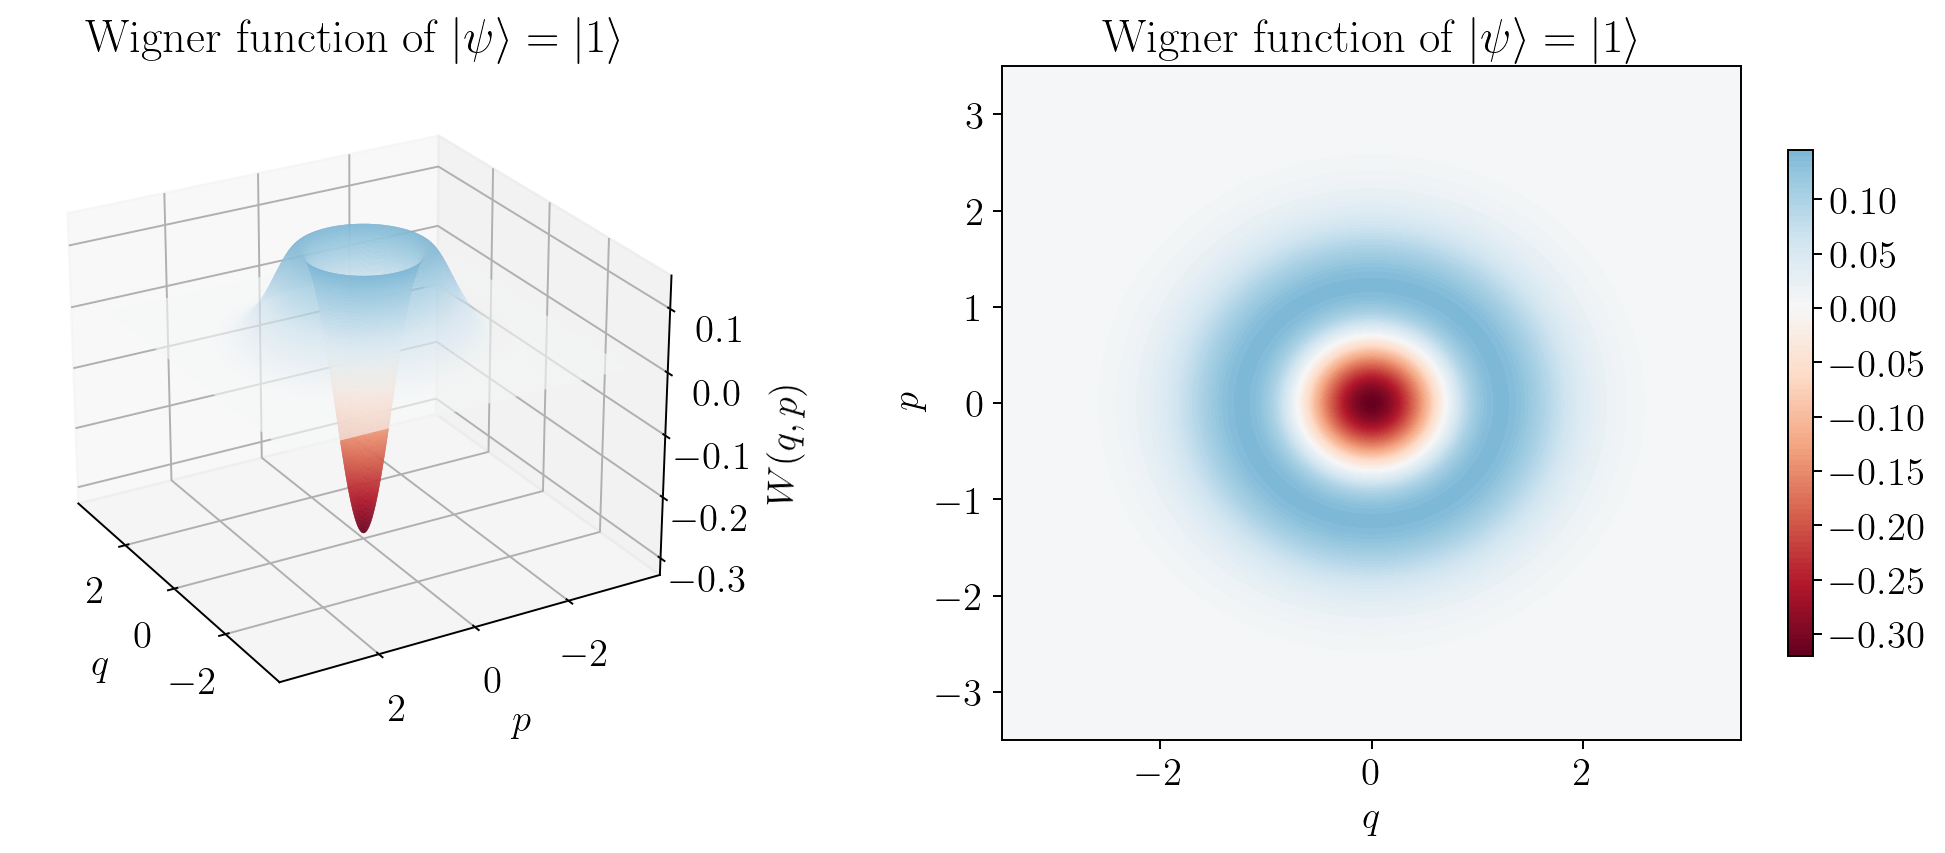

In [2]:
def fock_wigner(q, p, n):
    Ln = scp.special.laguerre(n) # the n-th Laguerre polynomial
    W = (-1.0)**n * np.exp(-q**2 - p**2) / np.pi * Ln(2*(q**2 + p**2))
    return W

max_quad = 3.5 # maximum quadrature value to plot
n = 1 # Fock state number
state_name = r'$|\psi\rangle=|1\rangle$'
points = 500 # number of points in each quadrature
q_points = p_points = np.linspace(-max_quad, max_quad, points)
Q, P = np.meshgrid(q_points, q_points)
W = fock_wigner(Q, P, n)
plot_wigner(Q, P, W, state_name, 25, 150)

### QuTiP: Wigner function of $\ket{\psi}=\ket{1}$

Let's use the `QuTiP` function `wigner` to compute the Wigner function to verify our results.

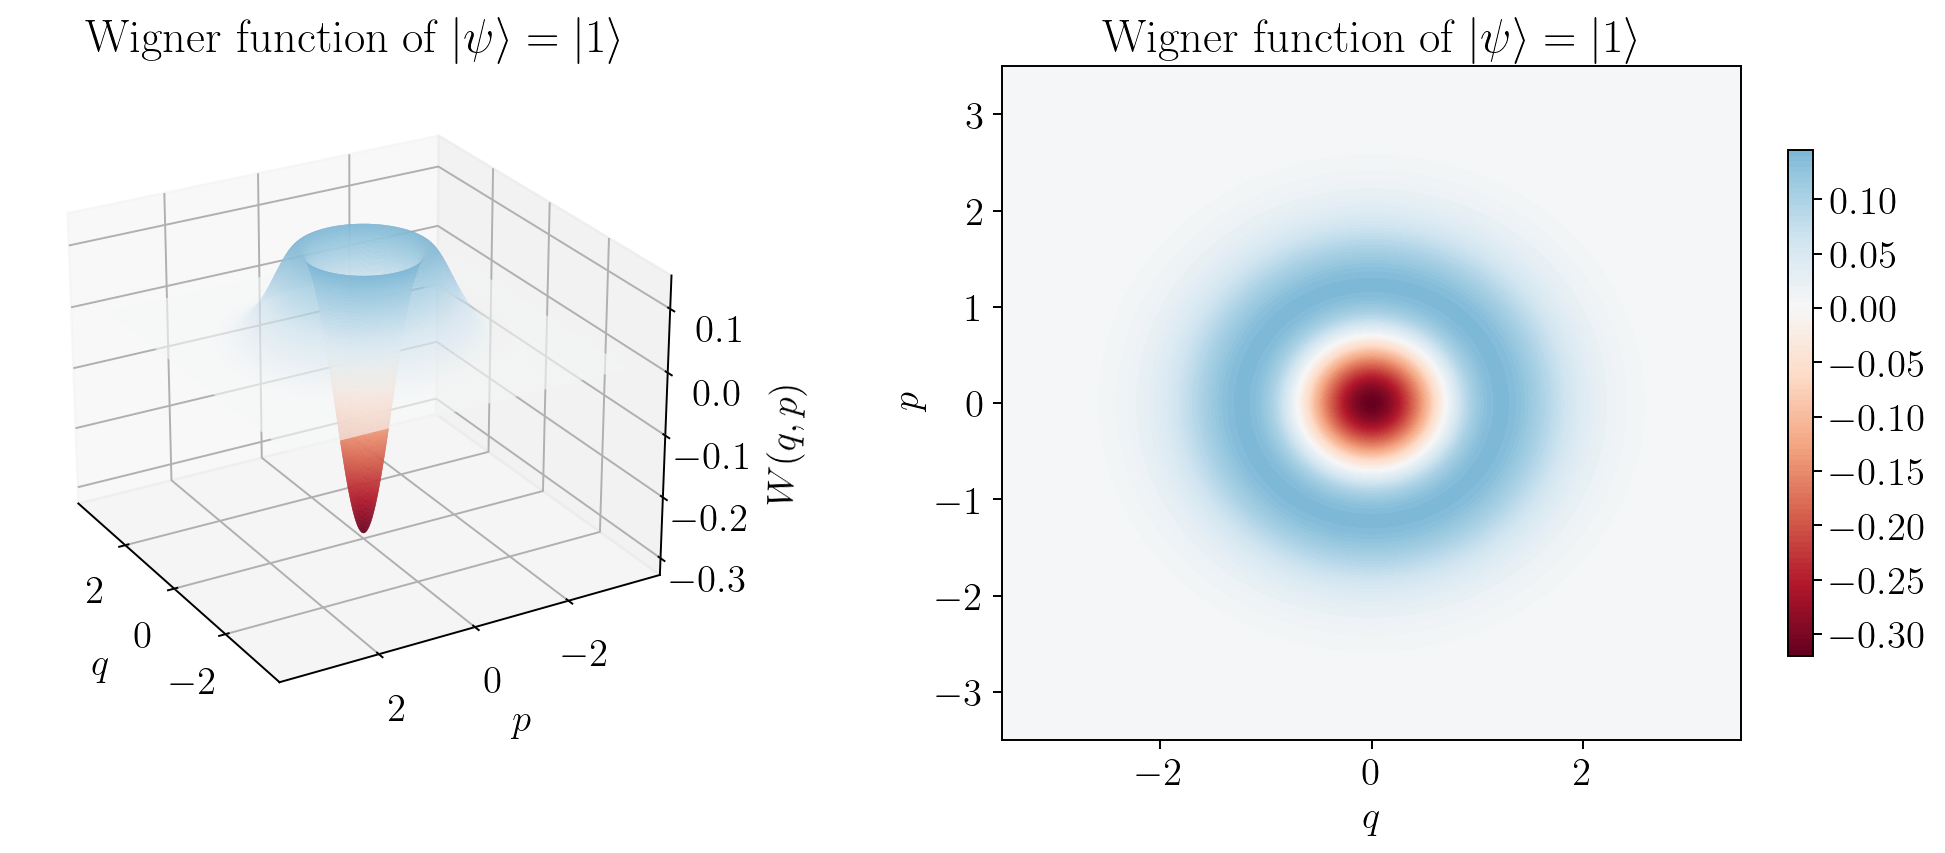

In [3]:
dim = 40 # Hilbert space truncation
psi = qt.fock_dm(dim, n)
q_points = p_points = np.linspace(-max_quad, max_quad, points)
W_qt = qt.wigner(psi, q_points, p_points)
plot_wigner(Q, P, W_qt, state_name, 25, 150)

## Properties of the Wigner function

The Wigner function has many interesting properties {cite:p}`leonhardt1997measuring`. For example it is real so $W(q,p) = W^*(q,p)$. Secondly it is normalized such that 

$$
\int^{\infty}_{-\infty}\int^{\infty}_{-\infty}W(q,p)dpdq = 1. 
$$

The Wigner function seems like it could be interpreted as a probability distribution. This is not true in general however since the Wigner function can take on negative values as we saw in the plot for the Wigner function of the Fock state $\ket{1}$. However the *marginals* of the Wigner function give the probability distribution (PDF) of the state over the values of the quadratures. That is 

$$
\int^{\infty}_{-\infty}W(q,p)dp = |\psi(q)|^2
$$

and 

$$
\int^{\infty}_{-\infty}W(q,p)dq = |\varphi(p)|^2.
$$

The overlap between two pure state $\ket{\psi}$ and $\ket{\phi}$ can also be computed in terms of their Wigner functions given by

$$
|\braket{\psi|\phi}|^2 = 2\pi\hbar\int^{\infty}_{-\infty}\int^{\infty}_{-\infty}W_\phi(q,p)W_\psi(q,p)dpdq.
$$

The Wigner function is also bounded such that 

$$
-\frac{1}{\hbar\pi} \leq W(q,p) \leq \frac{1}{\hbar\pi}.
$$

Lastly let's look at what the Wigner function of the Fock state $\ket{0}$, called the vacuum or ground state, looks like.

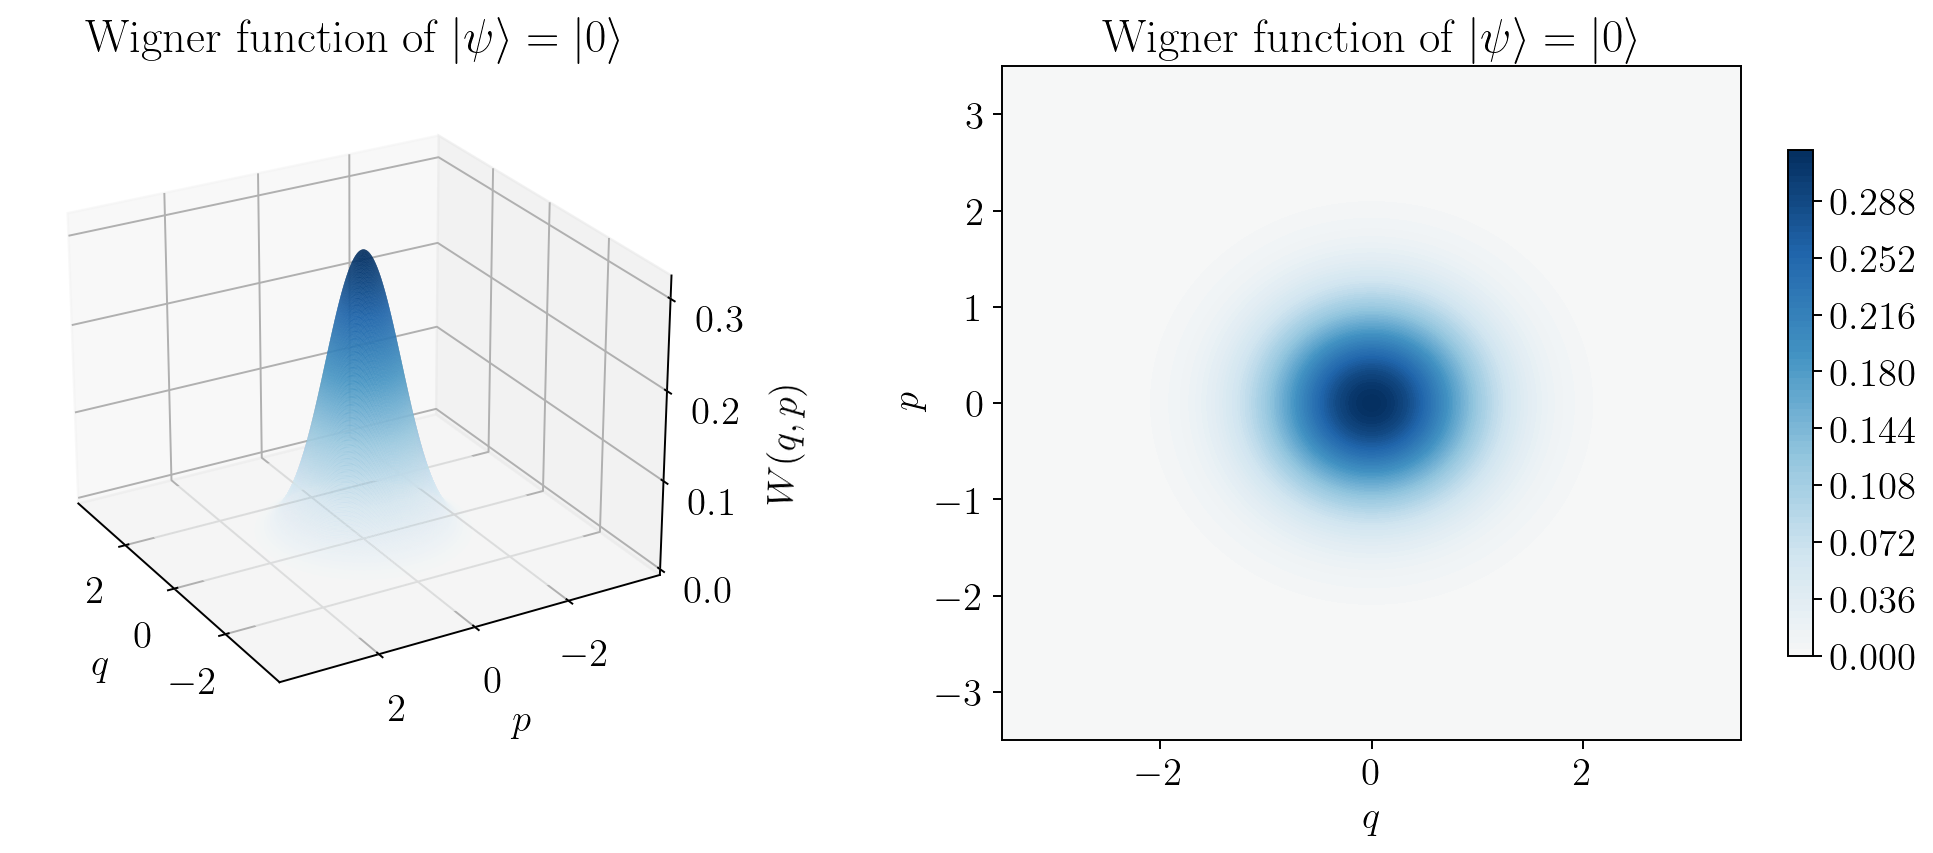

In [4]:
W = fock_wigner(Q, P, 0)
state_name = r'$|\psi\rangle=|0\rangle$'
plot_wigner(Q, P, W, state_name, 25, 150)

We can see that this is looks like a Gaussian (normal) distribution and more interestingly has no negative values unlike the Fock state $\ket{1}$. 

In [5]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Fri Jul 05 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.2

numpy     : 1.26.2
qutip     : 4.7.5
matplotlib: 3.7.4
scipy     : 1.12.0

